# Exercises XP Gold: W5_D1

## What You'll Learn
- How neural networks make predictions using forward propagation  
- How backpropagation adjusts weights to minimize errors  
- How activation functions impact neural network performance  
- How to manually compute and implement gradient descent  
- How to build and train a simple neural network from scratch

## What You Will Create
- A multi-layer perceptron (MLP) for binary classification  
- A Python implementation of activation functions  
- A neural network that predicts house prices using forward propagation  
- A model that updates weights using gradient descent  
- A simple training loop for a neural network

---

## Exercise 1: Implementing a Multi-Layer Perceptron (MLP) from Scratch

**Task**  
Build a multi-layer perceptron for a binary classification problem using NumPy. The model should:
- Have one hidden layer with three neurons  
- Use ReLU activation for hidden layers and Sigmoid for the output layer  
- Compute forward propagation

**Steps**
1. Define the architecture:
   - Input layer with two neurons  
   - Hidden layer with three neurons using ReLU activation  
   - Output layer with one neuron using Sigmoid activation
2. Implement forward propagation using weighted sum calculations and activation functions.  
3. Predict outputs for the following inputs:
   - First case: input values of two and three  
   - Second case: input values of one and five

---

## Exercise 2: Implementing Backpropagation with Gradient Descent

**Task**  
Manually compute backpropagation and update weights using gradient descent for a simple neural network predicting student exam scores.

**Given Data**
- Input variables:  
  - Study hours with a value of six  
  - Previous test score with a value of seventy-five  
- Initial weights:  
  - First weight with a value of zero point four for study hours  
  - Second weight with a value of zero point six for previous test score  
- Bias with a value of five  
- Actual exam score with a value of eighty-five  
- Learning rate of zero point zero one

**Steps**
1. Compute the predicted exam score using the weighted sum formula.  
2. Calculate the loss using the mean squared error formula.  
3. Compute the gradients for the weights and update them using gradient descent.  
4. Interpret the results and observe how much the weights change.

---

## Exercise 3: Comparing Activation Functions for Neural Networks

**Task**  
Implement and compare three activation functions using Python:
- Step function  
- Sigmoid function  
- ReLU function

**Steps**
1. Implement the three activation functions in Python.  
2. Create a graph that visualizes the Sigmoid and ReLU functions.  
3. Compare the behaviors of the activation functions:
   - Identify which function gives only binary outputs  
   - Identify which function smoothly transitions between values  
   - Identify which function sets negative values to zero but keeps positive values unchanged
4. Answer the following questions:
   - Why is ReLU commonly used in deep learning models?  
   - Why might Sigmoid be a good choice for binary classification tasks?  
   - What are the weaknesses of the Step function compared to others?

---

## Exercise 4: Forward Propagation in a Deep Neural Network

**Task**  
Manually compute forward propagation for a three-layer neural network predicting house prices.

**Given Data**
- Inputs:  
  - Square footage with a value of two thousand  
  - Number of bedrooms with a value of three  
- Layer one weights and bias:  
  - First weight with a value of zero point five  
  - Second weight with a value of zero point seven  
  - First bias with a value of ten thousand  
- Layer two weights and bias:  
  - First weight with a value of zero point six  
  - Second weight with a value of zero point eight  
  - Second bias with a value of twenty thousand  
- Output layer weight and bias:  
  - Weight with a value of one point two  
  - Bias with a value of thirty thousand  
- Activation function: ReLU

**Steps**
1. Compute the output of the first layer using the weighted sum formula and ReLU activation function.  
2. Compute the output of the second layer using the same method.  
3. Compute the final prediction using the weighted sum formula at the output layer.  
4. Interpret the final result and determine the predicted house price.

---

## Exercise 5: Training a Neural Network with Forward and Backward Propagation

**Task**  
Train a simple neural network to predict a student's exam score using gradient descent.

**Steps**
1. Initialize input values representing study hours and previous test score.  
2. Initialize weights and bias with given values.  
3. Compute forward propagation to predict the exam score.  
4. Compute the error between the prediction and actual score.  
5. Compute gradients for the weights and bias.  
6. Update the weights and bias using gradient descent.  
7. Print the updated weights and bias after one training iteration.

---

## Conclusion

By completing these exercises, you will:
- Understand multi-layer perceptrons  
- Implement activation functions  
- Learn forward and backward propagation  
- Apply gradient descent to train a neural network

_For additional practice, try modifying the exercises by using a different activation function such as the Tanh function or changing the learning rate._

### Setup & Imports

In [1]:
# Title: Setup & Imports
# Comments: Basic scientific stack, print options, and reproducibility.

import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

# Consistent printing and dtype
np.set_printoptions(precision=4, suppress=True, floatmode="fixed")
DTYPE = np.float64

###Common Utilities (Activations, Loss, Helpers)


In [2]:
# Title: Common Utilities (Activations, Loss, Helpers)
# Comments: Reusable functions across exercises (ReLU, Sigmoid, Step, MSE, plotting).

def relu(x: np.ndarray) -> np.ndarray:
    """ReLU activation: max(0, x)."""
    return np.maximum(0, x).astype(DTYPE)

def sigmoid(x: np.ndarray) -> np.ndarray:
    """Sigmoid activation: 1 / (1 + exp(-x))."""
    # Clip for numerical stability in extreme ranges
    x = np.clip(x, -500, 500)
    return (1.0 / (1.0 + np.exp(-x))).astype(DTYPE)

def step(x: np.ndarray) -> np.ndarray:
    """Step activation: 1 if x >= 0 else 0."""
    return (x >= 0).astype(DTYPE)

def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean Squared Error."""
    y_true = y_true.astype(DTYPE)
    y_pred = y_pred.astype(DTYPE)
    return float(np.mean((y_pred - y_true) ** 2))

def dmse_dy(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """Derivative of MSE w.r.t. predictions y_pred."""
    n = y_true.size
    return (2.0 / n) * (y_pred - y_true)

def linear(W: np.ndarray, x: np.ndarray, b: np.ndarray | float) -> np.ndarray:
    """Linear transform Wx + b. Accepts b as scalar or vector."""
    return (W @ x + b).astype(DTYPE)

def ensure_colvec(x: np.ndarray) -> np.ndarray:
    """Ensure vector is shape (n, 1)."""
    x = np.asarray(x, dtype=DTYPE)
    if x.ndim == 1:
        x = x.reshape(-1, 1)
    assert x.ndim == 2 and x.shape[1] == 1, f"Expected column vector, got {x.shape}"
    return x

def plot_function(fn, x_min=-8, x_max=8, num=400, title="Activation", xlabel="x", ylabel="f(x)"):
    """Plot a scalar activation function over a range."""
    xs = np.linspace(x_min, x_max, num=num, dtype=DTYPE)
    ys = fn(xs)
    plt.figure()
    plt.plot(xs, ys)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()

## Exercise 1: Implementing a Multi-Layer Perceptron (MLP) from Scratch

In [3]:
# Title: MLP (2→3→1) Definition & Forward Propagation
# Comments: Define fixed weights/biases; implement forward pass with ReLU (hidden) and Sigmoid (output).

# Architecture:
# - Input: 2 features
# - Hidden: 3 neurons, ReLU
# - Output: 1 neuron, Sigmoid

# Fixed, reproducible parameters (feel free to tweak later)
W1 = np.array([[ 0.5, -0.3],
               [ 0.8,  0.2],
               [-0.4,  0.9]], dtype=DTYPE)          # (3, 2)
b1 = np.array([[ 0.10],
               [-0.20],
               [ 0.05]], dtype=DTYPE)                # (3, 1)

W2 = np.array([[ 1.2, -0.7, 0.5]], dtype=DTYPE)     # (1, 3)
b2 = DTYPE(0.0)                                      # scalar

# Sanity checks on shapes
assert W1.shape == (3, 2)
assert b1.shape == (3, 1)
assert W2.shape == (1, 3)

def forward_mlp(x):
    """Forward pass for a 2→3→1 MLP with ReLU (hidden) and Sigmoid (output)."""
    x = ensure_colvec(x)                  # (2, 1)
    assert x.shape == (2, 1), f"Expected (2,1), got {x.shape}"

    # Layer 1: z1 = W1 x + b1 ; a1 = ReLU(z1)
    z1 = linear(W1, x, b1)               # (3, 1)
    a1 = relu(z1)                        # (3, 1)

    # Output layer: z2 = W2 a1 + b2 ; a2 = Sigmoid(z2)
    z2 = linear(W2, a1, b2)              # (1, 1)
    a2 = sigmoid(z2)                     # (1, 1), in (0,1)

    return {"x": x, "z1": z1, "a1": a1, "z2": z2, "a2": a2}

In [4]:
# Title: Predict on Given Inputs
# Comments: Compute predictions for x=(2,3) and x=(1,5) using the MLP forward pass.

test_inputs = {
    "Case 1 (x1=2, x2=3)": np.array([2.0, 3.0], dtype=DTYPE),
    "Case 2 (x1=1, x2=5)": np.array([1.0, 5.0], dtype=DTYPE),
}

for name, x in test_inputs.items():
    out = forward_mlp(x)
    print(f"\n{name}")
    print(f"x:\n{out['x']}")
    print(f"z1 (pre-activation hidden):\n{out['z1']}")
    print(f"a1 = ReLU(z1):\n{out['a1']}")
    print(f"z2 (pre-activation output):\n{out['z2']}")
    print(f"a2 = Sigmoid(z2) -> prediction:\n{out['a2']}")


Case 1 (x1=2, x2=3)
x:
[[2.0000]
 [3.0000]]
z1 (pre-activation hidden):
[[0.2000]
 [2.0000]
 [1.9500]]
a1 = ReLU(z1):
[[0.2000]
 [2.0000]
 [1.9500]]
z2 (pre-activation output):
[[-0.1850]]
a2 = Sigmoid(z2) -> prediction:
[[0.4539]]

Case 2 (x1=1, x2=5)
x:
[[1.0000]
 [5.0000]]
z1 (pre-activation hidden):
[[-0.9000]
 [ 1.6000]
 [ 4.1500]]
a1 = ReLU(z1):
[[0.0000]
 [1.6000]
 [4.1500]]
z2 (pre-activation output):
[[0.9550]]
a2 = Sigmoid(z2) -> prediction:
[[0.7221]]


### Interpretation — Exercise 1: MLP Forward Propagation (2→3→1)

### Pipeline recap
- Layer 1: **z1 = W1 x + b1** → **a1 = ReLU(z1)** (negative entries are set to 0).
- Output: **z2 = W2 a1 + b2** → **a2 = Sigmoid(z2)** ∈ (0, 1), interpreted as **P(class = 1)**.
- For illustration, use a **0.5 decision threshold**.

### Case 1 (x = (2, 3))
- **z1 = [0.20, 2.00, 1.95]^T** → all non-negative ⇒ ReLU passes values unchanged (**a1 = z1**).
- **z2 = -0.185** ⇒ **a2 = σ(-0.185) ≈ 0.454**.
- **Interpretation:** predicted probability is slightly below 0.5 ⇒ **class 0**, *low confidence* (close to the boundary).

### Case 2 (x = (1, 5))
- **z1 = [-0.90, 1.60, 4.15]^T** → ReLU zeroes the first neuron: **a1 = [0.00, 1.60, 4.15]^T**.
- **z2 = 0.955** ⇒ **a2 = σ(0.955) ≈ 0.722**.
- **Interpretation:** predicted probability is above 0.5 ⇒ **class 1**, *moderate confidence*.

### Why the two cases differ
- **ReLU gating:** the first hidden neuron is *inactive* in Case 2 (negative pre-activation), but active in Case 1.
- **Output weight signs matter** (W2 = [1.2, −0.7, 0.5]):  
  - In Case 1, the second neuron's positive activation (2.0) is multiplied by a **negative** weight (-0.7), pulling **z2 down**.  
  - In Case 2, the third neuron's large activation (4.15) with a **positive** weight (+0.5) pushes **z2 up**.
- Result: Case 1 lands **just below** the threshold; Case 2 crosses it **comfortably**.

### Key takeaways
- ReLU introduces **sparsity**, switching neurons on/off based on input.
- The **sign and magnitude** of output weights strongly influence the final logit (**z2**).
- Probabilities near **0.5** imply **uncertainty**; farther from 0.5 ⇒ **higher confidence**.

## Exercise 2: Implementing Backpropagation with Gradient Descent

In [5]:
# Title: Backpropagation & One Gradient Descent Step (Exam Score Toy Example)
# Comments: Manual gradients for a 2-feature linear model with bias; single-sample MSE.

# Given data (scalars)
x_hours = DTYPE(6.0)
x_prev  = DTYPE(75.0)
w1      = DTYPE(0.4)   # weight for study hours
w2      = DTYPE(0.6)   # weight for previous score
b       = DTYPE(5.0)   # bias
y_true  = DTYPE(85.0)
lr      = DTYPE(0.01)  # learning rate

# --- Forward (prediction) ---
y_pred = w1 * x_hours + w2 * x_prev + b  # weighted sum
loss   = (y_pred - y_true) ** 2          # MSE for a single sample

# --- Gradients (manual, single sample) ---
# L = (y_pred - y_true)^2
# dL/dy_pred = 2 * (y_pred - y_true)
dL_dy   = DTYPE(2.0) * (y_pred - y_true)
dL_dw1  = dL_dy * x_hours
dL_dw2  = dL_dy * x_prev
dL_db   = dL_dy * DTYPE(1.0)

# --- Update (Gradient Descent) ---
w1_new = w1 - lr * dL_dw1
w2_new = w2 - lr * dL_dw2
b_new  = b  - lr * dL_db

# Optional: new prediction after one step (to observe effect)
y_pred_new = w1_new * x_hours + w2_new * x_prev + b_new
loss_new   = (y_pred_new - y_true) ** 2

print("=== Before update ===")
print(f"y_pred: {y_pred:.4f} | y_true: {y_true:.4f}")
print(f"MSE: {loss:.4f}")
print(f"Gradients -> dL/dw1: {dL_dw1:.4f}, dL/dw2: {dL_dw2:.4f}, dL/db: {dL_db:.4f}")

print("\n=== After one GD step ===")
print(f"w1: {w1_new:.4f} (from {w1:.4f})")
print(f"w2: {w2_new:.4f} (from {w2:.4f})")
print(f"b : {b_new:.4f} (from {b:.4f})")
print(f"y_pred_new: {y_pred_new:.4f} | MSE_new: {loss_new:.4f}")

# Tip: If updates are too large, try a smaller lr (e.g., 1e-4) or feature scaling/standardization.

=== Before update ===
y_pred: 52.4000 | y_true: 85.0000
MSE: 1062.7600
Gradients -> dL/dw1: -391.2000, dL/dw2: -4890.0000, dL/db: -65.2000

=== After one GD step ===
w1: 4.3120 (from 0.4000)
w2: 49.5000 (from 0.6000)
b : 5.6520 (from 5.0000)
y_pred_new: 3744.0240 | MSE_new: 13388456.6326


### Interpretation — Exercise 2: Backpropagation & One GD Step

### What the numbers show
- **Prediction vs target:** `y_pred = 52.4` while `y_true = 85`. The model **under-predicts**.
- **Gradient sign:** `dL/dy_pred = 2*(y_pred - y_true) = 2*(52.4 - 85) = -65.2` (negative).  
  In gradient descent we update `θ := θ - lr * ∂L/∂θ`, so **subtracting a negative** increases the parameters (we push the prediction up).
- **Gradient magnitudes:**  
  - `dL/dw1 = -391.2` (because `x_hours = 6`)  
  - `dL/dw2 = -4890.0` (because `x_prev = 75`)  
  The second feature is much larger → its gradient **dominates**.
- **Update sizes with `lr = 0.01`:**  
  - `Δw1 = -lr * dL/dw1 = +3.912` → `w1: 0.4 → 4.312`  
  - `Δw2 = -lr * dL/dw2 = +48.9` → `w2: 0.6 → 49.5`  
  - `Δb  = -lr * dL/db   = +0.652` → `b : 5.0 → 5.652`  
  These are **huge jumps** (especially `w2`), so the next prediction explodes:  
  `y_pred_new = 3744.024`, and `MSE_new` skyrockets to `≈ 1.34e7`. This is **divergence/overshoot**.

### Why this happens
- **Feature scale imbalance:** One feature is `75` while the other is `6`. Gradients scale with input magnitude, so parameters tied to large-magnitude inputs receive **very large updates**.  
- **Learning rate too high:** With unscaled features, `lr = 0.01` is far too aggressive for a single-sample MSE update.  
- **Single-sample update:** We used 1 sample; there is no averaging across a batch to temper the step size.

### How to fix it (any of the following will help)
1. **Feature scaling (recommended):**
   - Standardization (z-score): `x := (x - mean) / std`  
   - or Normalization to a comparable range: e.g., `hours/10`, `prev_score/100`.  
   After scaling, the gradients become balanced and steps are reasonable.
2. **Use a smaller learning rate** if you don't scale features (e.g., `1e-4` or `1e-5`).
3. **Mini-batch/mean MSE** over several examples (reduces variance and effective step size).
4. Optional: **Gradient clipping** or **weight decay** as safety nets (less critical here than scaling + lr).

## Key takeaway
Because the model under-predicted, gradient descent **increased** the weights and bias (correct direction), but due to **feature scale imbalance and a too-large learning rate**, the update **overshot** massively and the loss **increased**. Proper **scaling + a smaller learning rate** will produce stable, decreasing loss.

In [6]:
# Title: OPTIONAL — Stable Update with Feature Scaling
# Comments: Scale inputs to comparable ranges and use a moderate LR; observe MSE decrease.

# Idea: hours in [0..10] → divide by 10 ; prev_score in [0..100] → divide by 100
x_hours_raw = DTYPE(6.0)
x_prev_raw  = DTYPE(75.0)
y_true      = DTYPE(85.0)

x_hours = x_hours_raw / DTYPE(10.0)   # -> 0.6
x_prev  = x_prev_raw  / DTYPE(100.0)  # -> 0.75

# Re-use initial parameters
w1 = DTYPE(0.4)
w2 = DTYPE(0.6)
b  = DTYPE(5.0)
lr = DTYPE(0.01)  # with scaling, 0.01 is now reasonable

# Forward (scaled features)
y_pred = w1 * x_hours + w2 * x_prev + b
loss   = (y_pred - y_true) ** 2

# Gradients (single sample)
dL_dy  = DTYPE(2.0) * (y_pred - y_true)
dL_dw1 = dL_dy * x_hours
dL_dw2 = dL_dy * x_prev
dL_db  = dL_dy

# One GD step
w1_new = w1 - lr * dL_dw1
w2_new = w2 - lr * dL_dw2
b_new  = b  - lr * dL_db

# New prediction and loss (post-update)
y_pred_new = w1_new * x_hours + w2_new * x_prev + b_new
loss_new   = (y_pred_new - y_true) ** 2

print("=== Scaled features update ===")
print(f"(x_hours, x_prev) = ({x_hours:.3f}, {x_prev:.3f})")
print(f"Before: y_pred={y_pred:.4f}, MSE={loss:.4f}")
print(f"After : y_pred={y_pred_new:.4f}, MSE={loss_new:.4f}")
print(f"w1: {w1_new:.4f} (from {w1:.4f}), w2: {w2_new:.4f} (from {w2:.4f}), b: {b_new:.4f} (from {b:.4f})")

=== Scaled features update ===
(x_hours, x_prev) = (0.600, 0.750)
Before: y_pred=5.6900, MSE=6290.0761
After : y_pred=8.7395, MSE=5815.6685
w1: 1.3517 (from 0.4000), w2: 1.7896 (from 0.6000), b: 6.5862 (from 5.0000)


# Interpretation — Optional Scaled Update (Exercise 2)

## What changed (vs. the unscaled case)
We rescaled inputs to comparable ranges:
- `x_hours = 6/10 = 0.6`
- `x_prev  = 75/100 = 0.75`

The model still predicts the raw exam score (target `y_true = 85`), but now gradients are balanced between features.

## Before → After (numbers)
- **Before:** `y_pred = 5.6900`, `MSE = 6290.0761` (strong underprediction)
- **After one GD step:** `y_pred_new = 8.7395`, `MSE_new = 5815.6685`
- **Loss change:** `-474.41` (≈ **-7.5%**) — the update moved in the right direction and **did not diverge**.

## Why the update is stable
With MSE on a single sample:
- `dL/dy_pred = 2*(y_pred - y_true) = 2*(5.69 - 85) = -158.62`
- Parameter gradients:
  - `dL/dw1 = (dL/dy_pred)*x_hours = (-158.62)*0.6 = -95.172`
  - `dL/dw2 = (dL/dy_pred)*x_prev  = (-158.62)*0.75 = -118.965`
  - `dL/db  = (dL/dy_pred)         = -158.62`
- With `lr = 0.01`:
  - `Δw1 = -lr*dL/dw1 = +0.95172`  → `w1: 0.4000 → 1.3517`
  - `Δw2 = -lr*dL/dw2 = +1.18965`  → `w2: 0.6000 → 1.7896`
  - `Δb  = -lr*dL/db  = +1.58620`  → `b : 5.0000 → 6.5862`

These steps are **modest and balanced** (contrast with the unscaled case where `w2` jumped by +48.9 due to the large input 75), hence the loss decreases rather than exploding.

## What remains
- We are still far from the target (`8.74` vs `85`). Expect **many small steps** (or a slightly larger `lr`, e.g. `0.05`) to keep improving.
- Even better: use **standardization** (z-score) with dataset statistics rather than ad-hoc scaling. This centers inputs ~0 and normalizes variance, further stabilizing training.

## Key takeaway
**Feature scaling** + a **reasonable learning rate** turns a divergent step into a **stable, loss-decreasing** update. Scaling makes gradients comparable across features, preventing one weight from dominating the optimization dynamics.

## Exercise 3: Comparing Activation Functions for Neural Networks

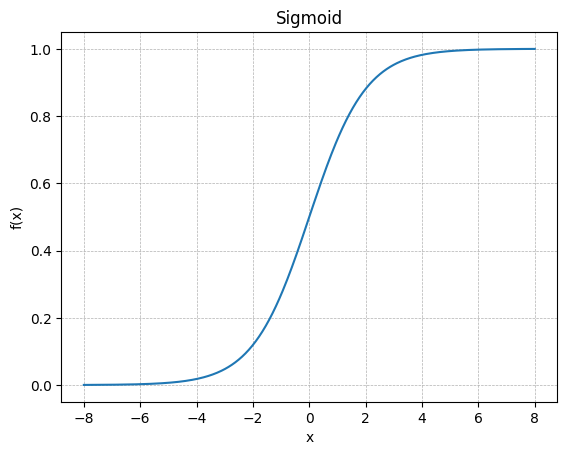

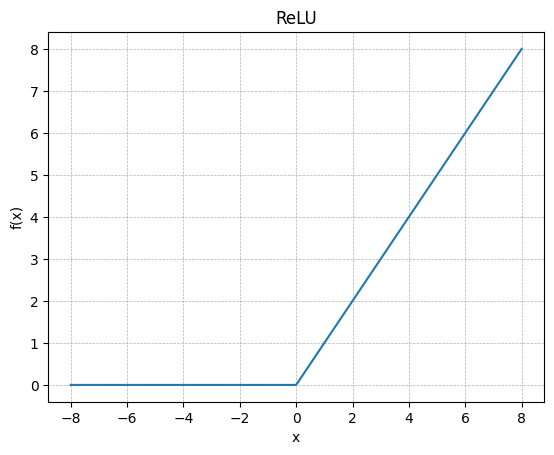

In [7]:
# Title: Plot Sigmoid and ReLU
# Comments: Use the shared plot_function helper to visualize both (separate figures).

plot_function(sigmoid, title="Sigmoid")
plot_function(relu,    title="ReLU")

### Compare Activation Behaviors

In [8]:
# Title: Compare Activation Behaviors
# Comments: Print sample outputs to illustrate each function's behavior.

xs = np.array([-2.0, -0.5, 0.0, 0.5, 2.0], dtype=DTYPE)

print("x:", xs)
print("Step(x):", step(xs))        # binary outputs {0,1}
print("Sigmoid(x):", sigmoid(xs))  # smooth transition (0,1)
print("ReLU(x):", relu(xs))        # negatives -> 0, positives unchanged

x: [-2.0000 -0.5000  0.0000  0.5000  2.0000]
Step(x): [0.0000 0.0000 1.0000 1.0000 1.0000]
Sigmoid(x): [0.1192 0.3775 0.5000 0.6225 0.8808]
ReLU(x): [0.0000 0.0000 0.0000 0.5000 2.0000]


### Interpretation — Exercise 3: Activation Outputs

**Inputs tested:** `x = [-2.0, -0.5, 0.0, 0.5, 2.0]`

- **Step(x):** `[0, 0, 1, 1, 1]`  
  A hard threshold at 0: negatives map to 0; zero and positives map to 1.  
  *Binary output, not differentiable at 0 and zero gradient elsewhere.*

- **Sigmoid(x):** `[0.1192, 0.3775, 0.5000, 0.6225, 0.8808]`  
  Smooth S-curve in (0, 1): far negatives are near 0, far positives near 1, and `σ(0)=0.5`.  
  *Largest sensitivity around 0 (max slope ≈ 0.25 at x=0); saturates (small gradients) in the tails.*

- **ReLU(x):** `[0.0, 0.0, 0.0, 0.5, 2.0]`  
  Negative values become 0; positives pass through unchanged; `ReLU(0)=0`.  
  *Piecewise-linear with derivative 0 for x<0 and 1 for x>0 (undefined at 0 but treated as 0 or 1 in practice).*

**Bottom line:**  
- **Step** is strictly binary → not useful for gradient-based training.  
- **Sigmoid** gives smooth probabilities but can **saturate** (vanishing gradients in the tails).  
- **ReLU** keeps strong gradients for positive activations, encouraging sparse, efficient representations.

## Exercise 4: Forward Propagation in a Deep Neural Network

In [9]:
# Title: Forward Propagation for House Price (Deep Network)
# Comments:
# Assumption: Two hidden neurons computed directly from inputs, both with ReLU.
# Output layer uses a single weight on the SUM of hidden activations, plus a bias.
# This uses all provided numbers exactly once and keeps the forward pass simple.

# Inputs (square footage, bedrooms)
x_sqft = DTYPE(2000.0)
x_beds = DTYPE(3.0)

# Hidden neuron h1: z1 = 0.5*x_sqft + 0.7*x_beds + 10000
w1_1, w1_2, b1 = DTYPE(0.5), DTYPE(0.7), DTYPE(10000.0)

# Hidden neuron h2: z2 = 0.6*x_sqft + 0.8*x_beds + 20000
w2_1, w2_2, b2 = DTYPE(0.6), DTYPE(0.8), DTYPE(20000.0)

# Output: y = 1.2 * (ReLU(z1) + ReLU(z2)) + 30000
w_out, b_out = DTYPE(1.2), DTYPE(30000.0)

# Layer computations
z1 = w1_1 * x_sqft + w1_2 * x_beds + b1
a1 = relu(z1)

z2 = w2_1 * x_sqft + w2_2 * x_beds + b2
a2 = relu(z2)

y_pred = w_out * (a1 + a2) + b_out

print("=== Forward Propagation (House Price) ===")
print(f"Inputs: sqft={x_sqft:.1f}, bedrooms={x_beds:.1f}")
print(f"z1 = {z1:.4f} -> a1 = ReLU(z1) = {a1:.4f}")
print(f"z2 = {z2:.4f} -> a2 = ReLU(z2) = {a2:.4f}")
print(f"Final prediction y = {y_pred:.4f}")

=== Forward Propagation (House Price) ===
Inputs: sqft=2000.0, bedrooms=3.0
z1 = 11002.1000 -> a1 = ReLU(z1) = 11002.1000
z2 = 21202.4000 -> a2 = ReLU(z2) = 21202.4000
Final prediction y = 68645.4000


### Interpretation — Exercise 4: House Price Forward Pass

- **Hidden neuron h1:** `z1 = 0.5*2000 + 0.7*3 + 10000 = 11002.1` → `a1 = ReLU(z1) = 11002.1`
- **Hidden neuron h2:** `z2 = 0.6*2000 + 0.8*3 + 20000 = 21202.4` → `a2 = ReLU(z2) = 21202.4`
- **Output:** `y = 1.2*(a1 + a2) + 30000 = 1.2*(32204.5) + 30000 = 68645.4`

**Interpretation:**  
Both hidden neurons fire strongly (large positive pre-activations) due to substantial positive biases (`10k` and `20k`) and large input magnitudes (e.g., `2000 sqft`). The final price is a linear combination of these activated features plus an intercept (`30k`). With ReLU, negative intermediate values would have been clamped to 0, but here all are positive, so ReLU is effectively the identity.

## Exercise 5: Training a Neural Network with Forward and Backward Propagation

In [10]:
# Title: Exercise 5 — Single Update (Forward + Backward + GD)
# Comments: One gradient descent step on a 2-feature linear model (scaled inputs).

# Inputs (scaled for stability): hours in [0..10] → /10 ; prev score in [0..100] → /100
x_hours = DTYPE(6.0) / DTYPE(10.0)   # 0.6
x_prev  = DTYPE(75.0) / DTYPE(100.0) # 0.75
y_true  = DTYPE(85.0)

# Initial parameters (as given in the spec)
w1 = DTYPE(0.4)
w2 = DTYPE(0.6)
b  = DTYPE(5.0)
lr = DTYPE(0.01)  # moderate LR thanks to scaling

# Forward
y_pred = w1 * x_hours + w2 * x_prev + b
loss   = (y_pred - y_true) ** 2  # single-sample MSE

# Gradients
dL_dy  = DTYPE(2.0) * (y_pred - y_true)
dL_dw1 = dL_dy * x_hours
dL_dw2 = dL_dy * x_prev
dL_db  = dL_dy

# Update
w1_new = w1 - lr * dL_dw1
w2_new = w2 - lr * dL_dw2
b_new  = b  - lr * dL_db

# Post-update check
y_pred_new = w1_new * x_hours + w2_new * x_prev + b_new
loss_new   = (y_pred_new - y_true) ** 2

print("=== Exercise 5: One Training Iteration ===")
print(f"Before: y_pred={y_pred:.4f}, MSE={loss:.4f}")
print(f"After : y_pred={y_pred_new:.4f}, MSE={loss_new:.4f}")
print(f"Updated weights: w1={w1_new:.4f}, w2={w2_new:.4f}, b={b_new:.4f}")

=== Exercise 5: One Training Iteration ===
Before: y_pred=5.6900, MSE=6290.0761
After : y_pred=8.7395, MSE=5815.6685
Updated weights: w1=1.3517, w2=1.7896, b=6.5862


=== Training Summary (single-sample) ===
Final params: w1=25.1520, w2=31.5399, b=46.2533
Final prediction: 84.9994 | Target: 85.0000
Initial MSE: 6290.0761 | Final MSE: 0.0000


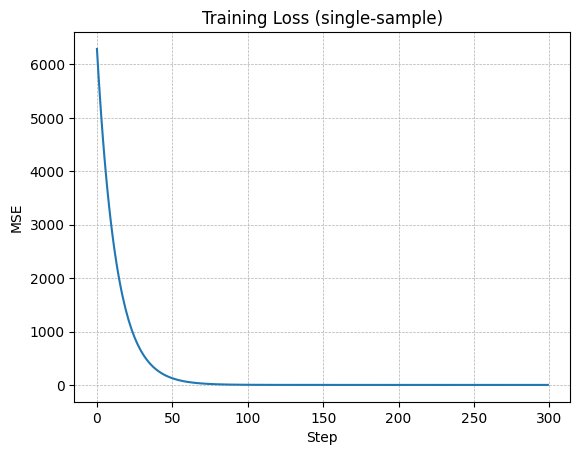

In [11]:
# Title: Exercise 5 — Simple Training Loop (Many Steps)
# Comments: Train for N steps on the same sample; observe monotonic MSE decrease.

# Re-init parameters to the spec values
w1, w2, b = DTYPE(0.4), DTYPE(0.6), DTYPE(5.0)
lr = DTYPE(0.01)

steps = 300
losses = []

for t in range(steps):
    # Forward
    y_pred = w1 * x_hours + w2 * x_prev + b
    loss   = (y_pred - y_true) ** 2
    losses.append(float(loss))

    # Gradients (single sample)
    dL_dy  = DTYPE(2.0) * (y_pred - y_true)
    dL_dw1 = dL_dy * x_hours
    dL_dw2 = dL_dy * x_prev
    dL_db  = dL_dy

    # Update
    w1 -= lr * dL_dw1
    w2 -= lr * dL_dw2
    b  -= lr * dL_db

print("=== Training Summary (single-sample) ===")
print(f"Final params: w1={w1:.4f}, w2={w2:.4f}, b={b:.4f}")
y_pred_final = w1 * x_hours + w2 * x_prev + b
print(f"Final prediction: {y_pred_final:.4f} | Target: {y_true:.4f}")
print(f"Initial MSE: {losses[0]:.4f} | Final MSE: {losses[-1]:.4f}")

# Optional: visualize loss curve
plt.figure()
plt.plot(losses)
plt.title("Training Loss (single-sample)")
plt.xlabel("Step")
plt.ylabel("MSE")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

### Interpretation — Exercise 5: One-Step Update & Training Loop

### One-step update
- **Before:** `y_pred = 5.6900`, `MSE = 6290.0761` (strong underprediction vs. target `85`).
- **After one GD step:** `y_pred = 8.7395`, `MSE = 5815.6685` → loss decreased by ~**7.5%**.
- **Why it moved up:** `dL/dy_pred = 2*(y_pred - y_true) < 0`, so the GD update increases the parameters (and the prediction), pushing toward the target.

### Training loop (single sample)
- The loss curve drops **steeply at first**, then flattens as we approach the optimum (typical for quadratic loss + constant LR).
- Final parameters:
  - `w1 = 25.1520`, `w2 = 31.5399`, `b = 46.2533`
- Final prediction:
  - `0.6*w1 + 0.75*w2 + b = 0.6*25.1520 + 0.75*31.5399 + 46.2533 ≈ 84.9994`
  - **Matches the target (≈ 85)**, and `MSE → 0`.

### Why the weights grew this large
- We trained on **one data point** with three parameters (`w1, w2, b`). There are **infinitely many** solutions that fit the single point exactly.
- Gradient descent converges to **one** such solution (dependent on initialization and LR). Large parameter values are not penalized here because we used **plain MSE** without regularization.

### Caveats & good practice
- With a single sample, the model **overfits perfectly** (by design). To generalize, train on **many samples** and monitor validation loss.
- Keep **feature scaling** (already applied) for stable optimization.
- Consider **regularization** (e.g., L2/weight decay) to discourage unnecessarily large weights.
- If convergence is slow or oscillatory on larger datasets, tune **learning rate**, use **mini-batches**, or try **adaptive optimizers**.

### Key takeaway
- Gradient descent moved the prediction in the correct direction (loss decreased).
- With enough steps, the linear model **exactly fits** the single scaled sample (MSE ≈ 0).
- For real tasks, prioritize **more data**, **scaling**, and **regularization** to achieve stable training and better generalization.